In [1]:
import os
from os import path
from parameters import *
import sys
import pandas as pd

In [2]:
# Stock Ticker to get
TICKER = 'EPAM'
# Number of days ahead to forecast
LOOKUP_STEP = 20

In [3]:
# naming convention for model name
model_name = f"{date_now}_{TICKER}-{shuffle_str}-{scale_str}-{split_by_date_str}-{LOSS}-{OPTIMIZER}-{CELL.__name__}-seq-{N_STEPS}-step-{LOOKUP_STEP}-layers-{N_LAYERS}-units-{UNITS}-activation-{ACTIVATION}"
if BIDIRECTIONAL:
    model_name += "-b"
# file to save csv data to
ticker_data_filename = os.path.join("data", f"{TICKER}_{date_now}.csv")

In [4]:
# create these folders if they does not exist
if not os.path.isdir("results"):
    os.mkdir("results")

if not os.path.isdir("logs"):
    os.mkdir("logs")

if not os.path.isdir("data"):
    os.mkdir("data")

In [5]:
from stock_prediction import create_model, load_data
from tensorflow.keras.layers import LSTM
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard
import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], enable=True)

In [6]:
# load the data
data = load_data(TICKER, n_steps=N_STEPS, scale=SCALE, split_by_date=SPLIT_BY_DATE, shuffle=SHUFFLE, lookup_step=LOOKUP_STEP, test_size=TEST_SIZE, feature_columns=FEATURE_COLUMNS, ma_periods=MA_PERIODS)

G:\repos\Tutorials\TimeSeriesML\StockForecasts\stock_prediction.py:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['in_uptrend'][current] = df['in_uptrend'][previous]
G:\repos\Tutorials\TimeSeriesML\StockForecasts\stock_prediction.py:100: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lowerband'][current] = df['lowerband'][previous]
G:\repos\Tutorials\TimeSeriesML\StockForecasts\stock_prediction.py:95: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-

In [7]:
data

{'df':                   open        high         low       close    adjclose  \
 2019-01-02  113.790001  115.889999  112.300003  114.320000  114.320000   
 2019-01-03  112.559998  113.980003  111.440002  112.290001  112.290001   
 2019-01-04  114.000000  118.480003  113.339996  117.339996  117.339996   
 2019-01-07  120.000000  124.589996  119.269997  123.339996  123.339996   
 2019-01-08  124.599998  126.110001  122.120003  125.370003  125.370003   
 ...                ...         ...         ...         ...         ...   
 2022-03-15  216.929993  228.610001  210.919998  225.039993  225.039993   
 2022-03-16  233.509995  284.500000  232.300003  281.720001  281.720001   
 2022-03-17  270.470001  275.709991  261.970001  273.190002  273.190002   
 2022-03-18  273.230011  300.220001  271.839996  294.470001  294.470001   
 2022-03-18  273.230011  300.220001  271.839996  294.470001  294.470001   
 
              volume ticker        sma7        ema7       sma20  ...    percc1  \
 2019-01-0

In [8]:
# save the dataframe to csv file
data["df"].to_csv(ticker_data_filename)

In [9]:
# construct the model
model = create_model(sequence_length=N_STEPS, n_features=len(FEATURE_COLUMNS), loss=LOSS, units=UNITS, cell=CELL, n_layers=N_LAYERS,
                    dropout=DROPOUT, optimizer=OPTIMIZER, bidirectional=BIDIRECTIONAL, activation=ACTIVATION)

In [10]:
# create userful tensorflow callbacks
checkpointer = ModelCheckpoint(os.path.join("results", model_name + ".h5"), save_weights_only=True, save_best_only=True, verbose=1)
tensorboard = TensorBoard(log_dir=os.path.join("logs", model_name))

In [11]:
# train the model
history = model.fit(data["X_train"], data["y_train"],
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=(data["X_test"], data["y_test"]),
    callbacks=[checkpointer, tensorboard],
    verbose=1)

Epoch 1/400
1/1 [==============================] - ETA: 0s - loss: 0.2774 - mean_absolute_error: 0.2774
Epoch 00001: val_loss improved from inf to 0.25316, saving model to results\2022-03_EPAM-sh-1-sc-1-sbd-0-custom_loss-adam-LSTM-seq-50-step-20-layers-4-units-32-activation-sigmoid-b.h5
1/1 [==============================] - 11s 11s/step - loss: 0.2774 - mean_absolute_error: 0.2774 - val_loss: 0.2532 - val_mean_absolute_error: 0.2532
Epoch 2/400
1/1 [==============================] - ETA: 0s - loss: 0.2508 - mean_absolute_error: 0.2508
Epoch 00002: val_loss improved from 0.25316 to 0.22977, saving model to results\2022-03_EPAM-sh-1-sc-1-sbd-0-custom_loss-adam-LSTM-seq-50-step-20-layers-4-units-32-activation-sigmoid-b.h5
1/1 [==============================] - 0s 203ms/step - loss: 0.2508 - mean_absolute_error: 0.2508 - val_loss: 0.2298 - val_mean_absolute_error: 0.2298
Epoch 3/400
1/1 [==============================] - ETA: 0s - loss: 0.2277 - mean_absolute_error: 0.2277
Epoch 00003: va

Epoch 22/400
1/1 [==============================] - ETA: 0s - loss: 0.0680 - mean_absolute_error: 0.0680
Epoch 00022: val_loss improved from 0.08021 to 0.07758, saving model to results\2022-03_EPAM-sh-1-sc-1-sbd-0-custom_loss-adam-LSTM-seq-50-step-20-layers-4-units-32-activation-sigmoid-b.h5
1/1 [==============================] - 0s 132ms/step - loss: 0.0680 - mean_absolute_error: 0.0680 - val_loss: 0.0776 - val_mean_absolute_error: 0.0776
Epoch 23/400
1/1 [==============================] - ETA: 0s - loss: 0.0662 - mean_absolute_error: 0.0662
Epoch 00023: val_loss did not improve from 0.07758
1/1 [==============================] - 0s 113ms/step - loss: 0.0662 - mean_absolute_error: 0.0662 - val_loss: 0.0800 - val_mean_absolute_error: 0.0800
Epoch 24/400
1/1 [==============================] - ETA: 0s - loss: 0.0715 - mean_absolute_error: 0.0715
Epoch 00024: val_loss did not improve from 0.07758
1/1 [==============================] - 0s 109ms/step - loss: 0.0715 - mean_absolute_error: 0.

1/1 [==============================] - 0s 110ms/step - loss: 0.0626 - mean_absolute_error: 0.0626 - val_loss: 0.0778 - val_mean_absolute_error: 0.0778
Epoch 48/400
1/1 [==============================] - ETA: 0s - loss: 0.0640 - mean_absolute_error: 0.0640
Epoch 00048: val_loss did not improve from 0.07599
1/1 [==============================] - 0s 107ms/step - loss: 0.0640 - mean_absolute_error: 0.0640 - val_loss: 0.0778 - val_mean_absolute_error: 0.0778
Epoch 49/400
1/1 [==============================] - ETA: 0s - loss: 0.0655 - mean_absolute_error: 0.0655
Epoch 00049: val_loss did not improve from 0.07599
1/1 [==============================] - 0s 107ms/step - loss: 0.0655 - mean_absolute_error: 0.0655 - val_loss: 0.0774 - val_mean_absolute_error: 0.0774
Epoch 50/400
1/1 [==============================] - ETA: 0s - loss: 0.0648 - mean_absolute_error: 0.0648
Epoch 00050: val_loss did not improve from 0.07599
1/1 [==============================] - 0s 106ms/step - loss: 0.0648 - mean_abso

Epoch 71/400
1/1 [==============================] - ETA: 0s - loss: 0.0615 - mean_absolute_error: 0.0615
Epoch 00071: val_loss did not improve from 0.07178
1/1 [==============================] - 0s 106ms/step - loss: 0.0615 - mean_absolute_error: 0.0615 - val_loss: 0.0725 - val_mean_absolute_error: 0.0725
Epoch 72/400
1/1 [==============================] - ETA: 0s - loss: 0.0615 - mean_absolute_error: 0.0615
Epoch 00072: val_loss improved from 0.07178 to 0.07164, saving model to results\2022-03_EPAM-sh-1-sc-1-sbd-0-custom_loss-adam-LSTM-seq-50-step-20-layers-4-units-32-activation-sigmoid-b.h5
1/1 [==============================] - 0s 131ms/step - loss: 0.0615 - mean_absolute_error: 0.0615 - val_loss: 0.0716 - val_mean_absolute_error: 0.0716
Epoch 73/400
1/1 [==============================] - ETA: 0s - loss: 0.0571 - mean_absolute_error: 0.0571
Epoch 00073: val_loss improved from 0.07164 to 0.07071, saving model to results\2022-03_EPAM-sh-1-sc-1-sbd-0-custom_loss-adam-LSTM-seq-50-step-2

Epoch 91/400
1/1 [==============================] - ETA: 0s - loss: 0.0508 - mean_absolute_error: 0.0508
Epoch 00091: val_loss improved from 0.05108 to 0.04823, saving model to results\2022-03_EPAM-sh-1-sc-1-sbd-0-custom_loss-adam-LSTM-seq-50-step-20-layers-4-units-32-activation-sigmoid-b.h5
1/1 [==============================] - 0s 132ms/step - loss: 0.0508 - mean_absolute_error: 0.0508 - val_loss: 0.0482 - val_mean_absolute_error: 0.0482
Epoch 92/400
1/1 [==============================] - ETA: 0s - loss: 0.0490 - mean_absolute_error: 0.0490
Epoch 00092: val_loss improved from 0.04823 to 0.04752, saving model to results\2022-03_EPAM-sh-1-sc-1-sbd-0-custom_loss-adam-LSTM-seq-50-step-20-layers-4-units-32-activation-sigmoid-b.h5
1/1 [==============================] - 0s 142ms/step - loss: 0.0490 - mean_absolute_error: 0.0490 - val_loss: 0.0475 - val_mean_absolute_error: 0.0475
Epoch 93/400
1/1 [==============================] - ETA: 0s - loss: 0.0455 - mean_absolute_error: 0.0455
Epoch 0

Epoch 115/400
1/1 [==============================] - ETA: 0s - loss: 0.0428 - mean_absolute_error: 0.0428
Epoch 00115: val_loss did not improve from 0.03877
1/1 [==============================] - 0s 107ms/step - loss: 0.0428 - mean_absolute_error: 0.0428 - val_loss: 0.0443 - val_mean_absolute_error: 0.0443
Epoch 116/400
1/1 [==============================] - ETA: 0s - loss: 0.0445 - mean_absolute_error: 0.0445
Epoch 00116: val_loss did not improve from 0.03877
1/1 [==============================] - 0s 110ms/step - loss: 0.0445 - mean_absolute_error: 0.0445 - val_loss: 0.0428 - val_mean_absolute_error: 0.0428
Epoch 117/400
1/1 [==============================] - ETA: 0s - loss: 0.0421 - mean_absolute_error: 0.0421
Epoch 00117: val_loss did not improve from 0.03877
1/1 [==============================] - 0s 106ms/step - loss: 0.0421 - mean_absolute_error: 0.0421 - val_loss: 0.0433 - val_mean_absolute_error: 0.0433
Epoch 118/400
1/1 [==============================] - ETA: 0s - loss: 0.0430 

Epoch 139/400
1/1 [==============================] - ETA: 0s - loss: 0.0395 - mean_absolute_error: 0.0395
Epoch 00139: val_loss did not improve from 0.03488
1/1 [==============================] - 0s 107ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - val_loss: 0.0398 - val_mean_absolute_error: 0.0398
Epoch 140/400
1/1 [==============================] - ETA: 0s - loss: 0.0417 - mean_absolute_error: 0.0417
Epoch 00140: val_loss did not improve from 0.03488
1/1 [==============================] - 0s 107ms/step - loss: 0.0417 - mean_absolute_error: 0.0417 - val_loss: 0.0382 - val_mean_absolute_error: 0.0382
Epoch 141/400
1/1 [==============================] - ETA: 0s - loss: 0.0413 - mean_absolute_error: 0.0413
Epoch 00141: val_loss did not improve from 0.03488
1/1 [==============================] - 0s 110ms/step - loss: 0.0413 - mean_absolute_error: 0.0413 - val_loss: 0.0366 - val_mean_absolute_error: 0.0366
Epoch 142/400
1/1 [==============================] - ETA: 0s - loss: 0.0392 

1/1 [==============================] - ETA: 0s - loss: 0.0384 - mean_absolute_error: 0.0384
Epoch 00164: val_loss did not improve from 0.03292
1/1 [==============================] - 0s 111ms/step - loss: 0.0384 - mean_absolute_error: 0.0384 - val_loss: 0.0364 - val_mean_absolute_error: 0.0364
Epoch 165/400
1/1 [==============================] - ETA: 0s - loss: 0.0377 - mean_absolute_error: 0.0377
Epoch 00165: val_loss did not improve from 0.03292
1/1 [==============================] - 0s 112ms/step - loss: 0.0377 - mean_absolute_error: 0.0377 - val_loss: 0.0353 - val_mean_absolute_error: 0.0353
Epoch 166/400
1/1 [==============================] - ETA: 0s - loss: 0.0387 - mean_absolute_error: 0.0387
Epoch 00166: val_loss did not improve from 0.03292
1/1 [==============================] - 0s 113ms/step - loss: 0.0387 - mean_absolute_error: 0.0387 - val_loss: 0.0332 - val_mean_absolute_error: 0.0332
Epoch 167/400
1/1 [==============================] - ETA: 0s - loss: 0.0367 - mean_absolut

1/1 [==============================] - ETA: 0s - loss: 0.0390 - mean_absolute_error: 0.0390
Epoch 00189: val_loss did not improve from 0.03055
1/1 [==============================] - 0s 107ms/step - loss: 0.0390 - mean_absolute_error: 0.0390 - val_loss: 0.0352 - val_mean_absolute_error: 0.0352
Epoch 190/400
1/1 [==============================] - ETA: 0s - loss: 0.0395 - mean_absolute_error: 0.0395
Epoch 00190: val_loss did not improve from 0.03055
1/1 [==============================] - 0s 111ms/step - loss: 0.0395 - mean_absolute_error: 0.0395 - val_loss: 0.0330 - val_mean_absolute_error: 0.0330
Epoch 191/400
1/1 [==============================] - ETA: 0s - loss: 0.0374 - mean_absolute_error: 0.0374
Epoch 00191: val_loss did not improve from 0.03055
1/1 [==============================] - 0s 108ms/step - loss: 0.0374 - mean_absolute_error: 0.0374 - val_loss: 0.0316 - val_mean_absolute_error: 0.0316
Epoch 192/400
1/1 [==============================] - ETA: 0s - loss: 0.0382 - mean_absolut

Epoch 216/400
1/1 [==============================] - ETA: 0s - loss: 0.0354 - mean_absolute_error: 0.0354
Epoch 00216: val_loss did not improve from 0.03055
1/1 [==============================] - 0s 106ms/step - loss: 0.0354 - mean_absolute_error: 0.0354 - val_loss: 0.0306 - val_mean_absolute_error: 0.0306
Epoch 217/400
1/1 [==============================] - ETA: 0s - loss: 0.0365 - mean_absolute_error: 0.0365
Epoch 00217: val_loss improved from 0.03055 to 0.02950, saving model to results\2022-03_EPAM-sh-1-sc-1-sbd-0-custom_loss-adam-LSTM-seq-50-step-20-layers-4-units-32-activation-sigmoid-b.h5
1/1 [==============================] - 0s 129ms/step - loss: 0.0365 - mean_absolute_error: 0.0365 - val_loss: 0.0295 - val_mean_absolute_error: 0.0295
Epoch 218/400
1/1 [==============================] - ETA: 0s - loss: 0.0378 - mean_absolute_error: 0.0378
Epoch 00218: val_loss did not improve from 0.02950
1/1 [==============================] - 0s 108ms/step - loss: 0.0378 - mean_absolute_error:

Epoch 242/400
1/1 [==============================] - ETA: 0s - loss: 0.0350 - mean_absolute_error: 0.0350
Epoch 00242: val_loss did not improve from 0.02886
1/1 [==============================] - 0s 107ms/step - loss: 0.0350 - mean_absolute_error: 0.0350 - val_loss: 0.0324 - val_mean_absolute_error: 0.0324
Epoch 243/400
1/1 [==============================] - ETA: 0s - loss: 0.0364 - mean_absolute_error: 0.0364
Epoch 00243: val_loss did not improve from 0.02886
1/1 [==============================] - 0s 109ms/step - loss: 0.0364 - mean_absolute_error: 0.0364 - val_loss: 0.0321 - val_mean_absolute_error: 0.0321
Epoch 244/400
1/1 [==============================] - ETA: 0s - loss: 0.0347 - mean_absolute_error: 0.0347
Epoch 00244: val_loss did not improve from 0.02886
1/1 [==============================] - 0s 108ms/step - loss: 0.0347 - mean_absolute_error: 0.0347 - val_loss: 0.0318 - val_mean_absolute_error: 0.0318
Epoch 245/400
1/1 [==============================] - ETA: 0s - loss: 0.0341 

Epoch 267/400
1/1 [==============================] - ETA: 0s - loss: 0.0346 - mean_absolute_error: 0.0346
Epoch 00267: val_loss did not improve from 0.02760
1/1 [==============================] - 0s 108ms/step - loss: 0.0346 - mean_absolute_error: 0.0346 - val_loss: 0.0297 - val_mean_absolute_error: 0.0297
Epoch 268/400
1/1 [==============================] - ETA: 0s - loss: 0.0342 - mean_absolute_error: 0.0342
Epoch 00268: val_loss did not improve from 0.02760
1/1 [==============================] - 0s 106ms/step - loss: 0.0342 - mean_absolute_error: 0.0342 - val_loss: 0.0294 - val_mean_absolute_error: 0.0294
Epoch 269/400
1/1 [==============================] - ETA: 0s - loss: 0.0332 - mean_absolute_error: 0.0332
Epoch 00269: val_loss did not improve from 0.02760
1/1 [==============================] - 0s 107ms/step - loss: 0.0332 - mean_absolute_error: 0.0332 - val_loss: 0.0294 - val_mean_absolute_error: 0.0294
Epoch 270/400
1/1 [==============================] - ETA: 0s - loss: 0.0318 

1/1 [==============================] - ETA: 0s - loss: 0.0355 - mean_absolute_error: 0.0355
Epoch 00292: val_loss did not improve from 0.02518
1/1 [==============================] - 0s 109ms/step - loss: 0.0355 - mean_absolute_error: 0.0355 - val_loss: 0.0274 - val_mean_absolute_error: 0.0274
Epoch 293/400
1/1 [==============================] - ETA: 0s - loss: 0.0322 - mean_absolute_error: 0.0322
Epoch 00293: val_loss did not improve from 0.02518
1/1 [==============================] - 0s 141ms/step - loss: 0.0322 - mean_absolute_error: 0.0322 - val_loss: 0.0275 - val_mean_absolute_error: 0.0275
Epoch 294/400
1/1 [==============================] - ETA: 0s - loss: 0.0340 - mean_absolute_error: 0.0340
Epoch 00294: val_loss did not improve from 0.02518
1/1 [==============================] - 0s 117ms/step - loss: 0.0340 - mean_absolute_error: 0.0340 - val_loss: 0.0264 - val_mean_absolute_error: 0.0264
Epoch 295/400
1/1 [==============================] - ETA: 0s - loss: 0.0327 - mean_absolut

Epoch 319/400
1/1 [==============================] - ETA: 0s - loss: 0.0339 - mean_absolute_error: 0.0339
Epoch 00319: val_loss did not improve from 0.02518
1/1 [==============================] - 0s 109ms/step - loss: 0.0339 - mean_absolute_error: 0.0339 - val_loss: 0.0263 - val_mean_absolute_error: 0.0263
Epoch 320/400
1/1 [==============================] - ETA: 0s - loss: 0.0355 - mean_absolute_error: 0.0355
Epoch 00320: val_loss did not improve from 0.02518
1/1 [==============================] - 0s 106ms/step - loss: 0.0355 - mean_absolute_error: 0.0355 - val_loss: 0.0293 - val_mean_absolute_error: 0.0293
Epoch 321/400
1/1 [==============================] - ETA: 0s - loss: 0.0333 - mean_absolute_error: 0.0333
Epoch 00321: val_loss did not improve from 0.02518
1/1 [==============================] - 0s 107ms/step - loss: 0.0333 - mean_absolute_error: 0.0333 - val_loss: 0.0312 - val_mean_absolute_error: 0.0312
Epoch 322/400
1/1 [==============================] - ETA: 0s - loss: 0.0341 

Epoch 345/400
1/1 [==============================] - ETA: 0s - loss: 0.0308 - mean_absolute_error: 0.0308
Epoch 00345: val_loss did not improve from 0.02479
1/1 [==============================] - 0s 107ms/step - loss: 0.0308 - mean_absolute_error: 0.0308 - val_loss: 0.0267 - val_mean_absolute_error: 0.0267
Epoch 346/400
1/1 [==============================] - ETA: 0s - loss: 0.0321 - mean_absolute_error: 0.0321
Epoch 00346: val_loss improved from 0.02479 to 0.02386, saving model to results\2022-03_EPAM-sh-1-sc-1-sbd-0-custom_loss-adam-LSTM-seq-50-step-20-layers-4-units-32-activation-sigmoid-b.h5
1/1 [==============================] - 0s 132ms/step - loss: 0.0321 - mean_absolute_error: 0.0321 - val_loss: 0.0239 - val_mean_absolute_error: 0.0239
Epoch 347/400
1/1 [==============================] - ETA: 0s - loss: 0.0323 - mean_absolute_error: 0.0323
Epoch 00347: val_loss did not improve from 0.02386
1/1 [==============================] - 0s 112ms/step - loss: 0.0323 - mean_absolute_error:

Epoch 371/400
1/1 [==============================] - ETA: 0s - loss: 0.0313 - mean_absolute_error: 0.0313
Epoch 00371: val_loss did not improve from 0.02359
1/1 [==============================] - 0s 106ms/step - loss: 0.0313 - mean_absolute_error: 0.0313 - val_loss: 0.0284 - val_mean_absolute_error: 0.0284
Epoch 372/400
1/1 [==============================] - ETA: 0s - loss: 0.0315 - mean_absolute_error: 0.0315
Epoch 00372: val_loss did not improve from 0.02359
1/1 [==============================] - 0s 111ms/step - loss: 0.0315 - mean_absolute_error: 0.0315 - val_loss: 0.0256 - val_mean_absolute_error: 0.0256
Epoch 373/400
1/1 [==============================] - ETA: 0s - loss: 0.0307 - mean_absolute_error: 0.0307
Epoch 00373: val_loss did not improve from 0.02359
1/1 [==============================] - 0s 112ms/step - loss: 0.0307 - mean_absolute_error: 0.0307 - val_loss: 0.0245 - val_mean_absolute_error: 0.0245
Epoch 374/400
1/1 [==============================] - ETA: 0s - loss: 0.0302 

1/1 [==============================] - ETA: 0s - loss: 0.0307 - mean_absolute_error: 0.0307
Epoch 00397: val_loss did not improve from 0.02333
1/1 [==============================] - 1s 611ms/step - loss: 0.0307 - mean_absolute_error: 0.0307 - val_loss: 0.0255 - val_mean_absolute_error: 0.0255
Epoch 398/400
1/1 [==============================] - ETA: 0s - loss: 0.0315 - mean_absolute_error: 0.0315
Epoch 00398: val_loss did not improve from 0.02333
1/1 [==============================] - 0s 110ms/step - loss: 0.0315 - mean_absolute_error: 0.0315 - val_loss: 0.0238 - val_mean_absolute_error: 0.0238
Epoch 399/400
1/1 [==============================] - ETA: 0s - loss: 0.0310 - mean_absolute_error: 0.0310
Epoch 00399: val_loss did not improve from 0.02333
1/1 [==============================] - 0s 107ms/step - loss: 0.0310 - mean_absolute_error: 0.0310 - val_loss: 0.0237 - val_mean_absolute_error: 0.0237
Epoch 400/400
1/1 [==============================] - ETA: 0s - loss: 0.0291 - mean_absolut

In [12]:
# save the model
model.save(os.path.join("results", model_name) + ".h5")

In [14]:
# load model weights
model_path = os.path.join("results", model_name) + ".h5"
model.load_weights(model_path)

In [15]:
from stock_prediction import np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [16]:
def predict(model, data):
    # retrieve the last sequence from data
    last_sequence = data["last_sequence"][-N_STEPS:]
    # expand dimension
    last_sequence = np.expand_dims(last_sequence, axis=0)
    # get the prediction (scaled from 0 to 1)
    prediction = model.predict(last_sequence)
    # get the price (by inverting the scaling)
    if SCALE:
        predicted_price = data["column_scaler"]["adjclose"].inverse_transform(prediction)[0][0]
    else:
        predicted_price = prediction[0][0]
    return predicted_price

In [17]:
def predict_gap(model, data, df2, indexVals):
    predicted_prices = []
    for X in range(LOOKUP_STEP):
        # retrieve the last sequence from data
        last_sequence = data["last_sequence"][-N_STEPS-X:]
        last_sequence = last_sequence[:N_STEPS]
        # expand dimension
        last_sequence = np.expand_dims(last_sequence, axis=0)
        # get the prediction (scaled from 0 to 1)
        prediction = model.predict(last_sequence)
        # get the price (by inverting the scaling)
        if SCALE:
            predicted_price = data["column_scaler"]["adjclose"].inverse_transform(prediction)[0][0]
        else:
            predicted_price = prediction[0][0]   

        df2.loc[indexVals[-X],'forecast'] = predicted_price
    return df2

In [18]:
def plot_graph2(test_df, df2):
    """
    This function plots true close price along with predicted close price
    with blue and red colors respectively
    """
    plt.figure(figsize=(18,8))
    plt.title(TICKER+" Stock Price Forecast "+ f"{LOOKUP_STEP}" +" days out", fontsize=16)
    plt.plot(test_df[f'true_adjclose_{LOOKUP_STEP}'].tail(N_STEPS), c='b')
    plt.plot(test_df[f'adjclose_{LOOKUP_STEP}'].tail(N_STEPS), c='r')
    plt.plot(df2['forecast'].tail(LOOKUP_STEP-1), c='r')
    plt.xlabel("Days")
    plt.ylabel("Price")
    plt.legend(["Actual Price", "Predicted Price"])
    forecast_folder = "forecasts"
    if not os.path.isdir(forecast_folder):
        os.mkdir(forecast_folder)
    filename = os.path.join(forecast_folder, TICKER.lower() + "_" + f"{LOOKUP_STEP}" + "_forecast.png")
    plt.savefig(filename)
    plt.show()

In [19]:
def get_final_df(model, data):
    """
    This function takes the `model` and `data` dict to 
    construct a final dataframe that includes the features along 
    with true and predicted prices of the testing dataset
    """
    # if predicted future price is higher than the current, 
    # then calculate the true future price minus the current price, to get the buy profit
    buy_profit  = lambda current, true_future, pred_future: true_future - current if pred_future > current else 0
    # if the predicted future price is lower than the current price,
    # then subtract the true future price from the current price
    sell_profit = lambda current, true_future, pred_future: current - true_future if pred_future < current else 0
    X_test = data["X_test"]
    y_test = data["y_test"]
    # perform prediction and get prices
    y_pred = model.predict(X_test)
    if SCALE:
        y_test = np.squeeze(data["column_scaler"]["adjclose"].inverse_transform(np.expand_dims(y_test, axis=0)))
        y_pred = np.squeeze(data["column_scaler"]["adjclose"].inverse_transform(y_pred))
    test_df = data["test_df"]
    # add predicted future prices to the dataframe
    test_df[f"adjclose_{LOOKUP_STEP}"] = y_pred
    # add true future prices to the dataframe
    test_df[f"true_adjclose_{LOOKUP_STEP}"] = y_test
    # sort the dataframe by date
    test_df.sort_index(inplace=True)
    final_df = test_df
    # add the buy profit column
    final_df["buy_profit"] = list(map(buy_profit, 
                                    final_df["adjclose"], 
                                    final_df[f"adjclose_{LOOKUP_STEP}"], 
                                    final_df[f"true_adjclose_{LOOKUP_STEP}"])
                                    # since we don't have profit for last sequence, add 0's
                                    )
    # add the sell profit column
    final_df["sell_profit"] = list(map(sell_profit, 
                                    final_df["adjclose"], 
                                    final_df[f"adjclose_{LOOKUP_STEP}"], 
                                    final_df[f"true_adjclose_{LOOKUP_STEP}"])
                                    # since we don't have profit for last sequence, add 0's
                                    )
    return final_df

In [20]:
final_df = get_final_df(model, data)

In [21]:
df2 = data['df'].tail(LOOKUP_STEP)
df2['forecast'] = 0

C:\Users\shutt\AppData\Local\Temp/ipykernel_24340/3675880277.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['forecast'] = 0


In [22]:
indexVals = []
for index in df2.index:
    indexVals.append(index)    
future_prices = predict_gap(model, data, df2, indexVals)

C:\Anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



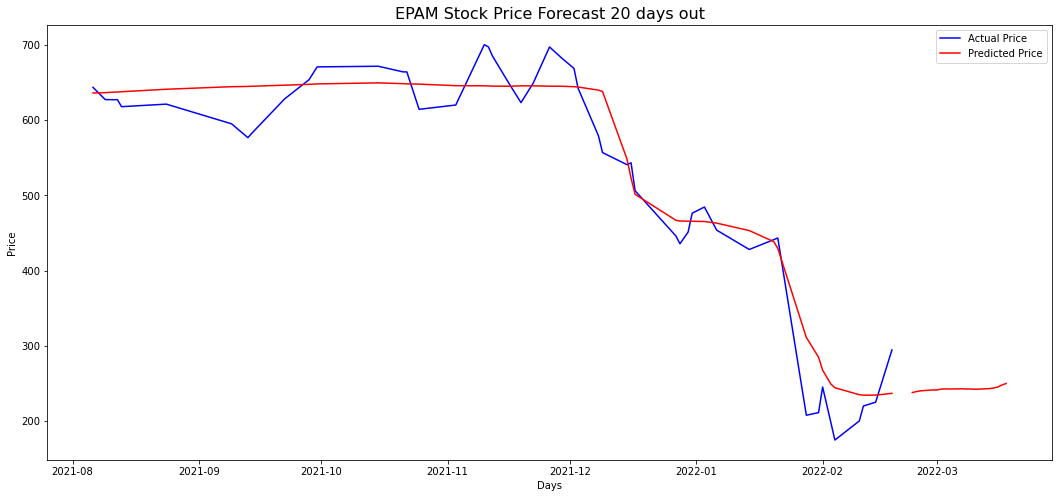

In [23]:
# plot true/pred prices graph
plot_graph2(final_df, df2)

In [24]:
future_price = predict(model, data)
print(f"Future $ price after {LOOKUP_STEP} days is {future_price:.2f}")

Future $ price after 20 days is 256.59
